In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




 Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Google Playstore:-
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


In [ ]:
df=pd.read_excel('/content/sample_data/flight_price.xlsx')


In [ ]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Data Preprocessing
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

df.drop('Date_of_Journey',axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  date             10683 non-null  object
 11  month            10683 non-null  object
 12  year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Data Preprocessing
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]

df.drop('Dep_Time',axis=1,inplace=True)

df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)


In [ ]:
# Data Preprocessing
df['Airline'].value_counts()

# Base on this data Jet Airways Business has only 6 records.
# It is better to map the airlines some of the airlines but before we do that let see the histogram for all airlines as is


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

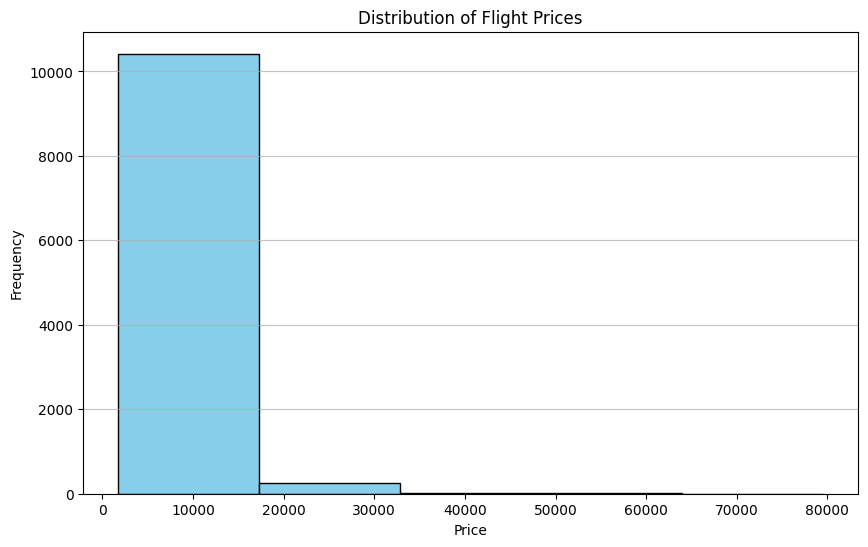

In [ ]:
# continue Q2
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


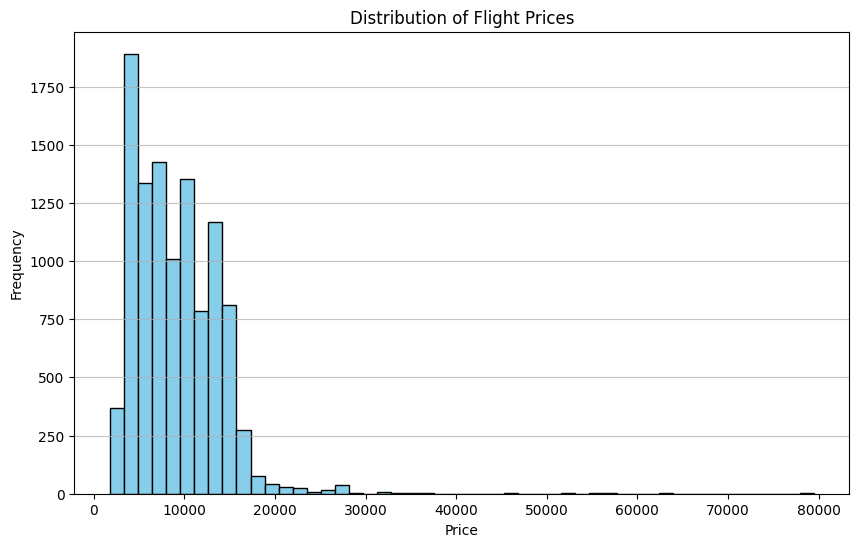

In [ ]:
# Plotting the histogram to see the distribution in more bins
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

print('Price Min is: ', df['Price'].min())
print('Price Max is: ', df['Price'].max())
print('Price range is between: ', df['Price'].min() , ' and ' , df['Price'].max())



Price Min is:  1759
Price Max is:  79512
Price range is between:  1759  and  79512


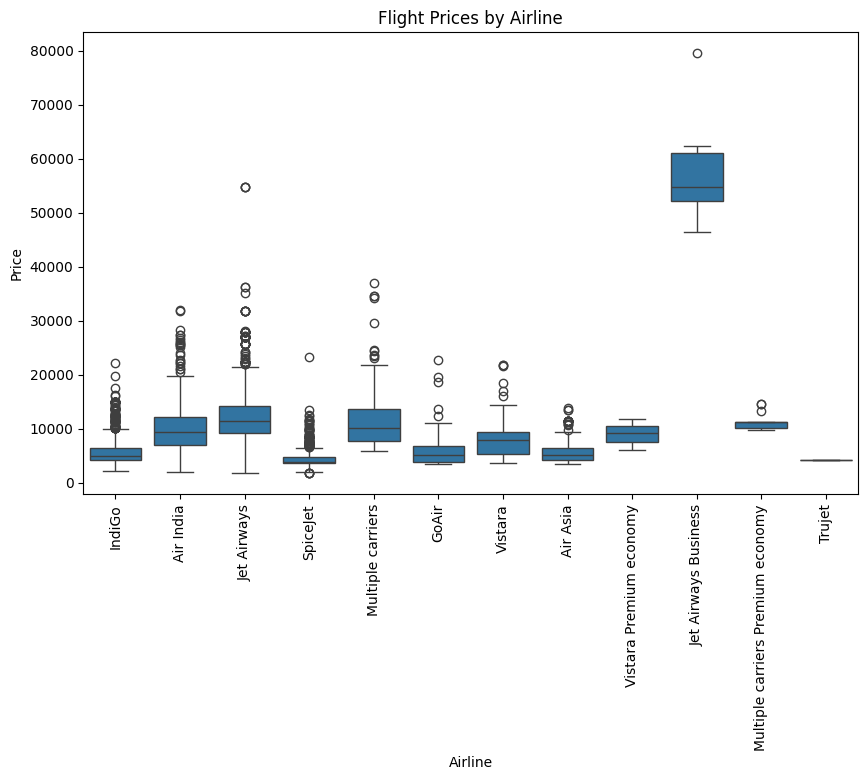

In [ ]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.


plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()

# The prices varies base on type or class,
# Jet Airways Business shows that this airlines has the highest cost flying with them since they offer a more comforable seats and services

In [ ]:
# Let us Map the Airlines accordingly
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5, 'GoAir':6, 'Air Asia':7,'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Trujet':4})

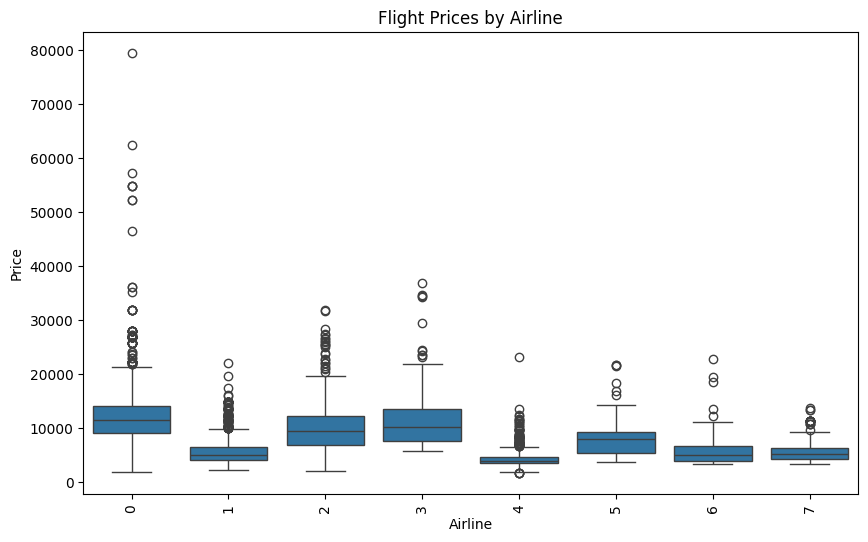

In [ ]:
# After the map
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()

In [ ]:
# Now let see us check the histogram after map
df['Airline']=df['Airline'].map({0:'Jet Airways', 1:'IndiGo', 2:'Air India', 3:'Multiple carriers', 4:'SpiceJet and Trujet', 5:'Vistara', 6:'GoAir', 7:'Air Asia'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   date             10683 non-null  object
 9   month            10683 non-null  object
 10  year             10683 non-null  object
 11  Dep_hour         10683 non-null  object
 12  Dep_mins         10683 non-null  object
 13  Arrival_hour     10683 non-null  object
 14  Arrival_mins     10683 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


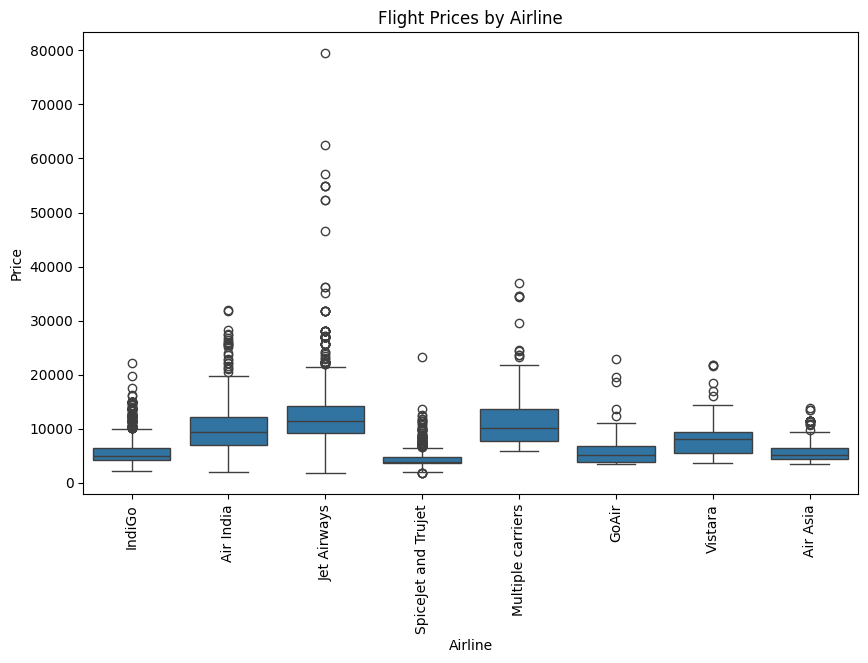

In [ ]:
# After the map
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()

In [ ]:
# The above boxplot shows that Jet Airways price has the highest price and is potentially an outlier, there is a
# posibility that prices from other airlines does not include business class.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   date             10683 non-null  object
 9   month            10683 non-null  object
 10  year             10683 non-null  object
 11  Dep_hour         10683 non-null  object
 12  Dep_mins         10683 non-null  object
 13  Arrival_hour     10683 non-null  object
 14  Arrival_mins     10683 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


In [ ]:
#Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.
# The above boxplot shows that Jet Airways price has the highest price and is potentially an outlier, there is a
# posibility that prices from other airlines does not include business class.

print('Each airlines Min and Max: ', df.groupby('Airline')['Price'].agg(['min', 'max']))

Each airlines Min and Max:                        min    max
Airline                         
Air Asia             3383  13774
Air India            2050  31945
GoAir                3398  22794
IndiGo               2227  22153
Jet Airways          1840  79512
Multiple carriers    5797  36983
SpiceJet and Trujet  1759  23267
Vistara              3687  21730


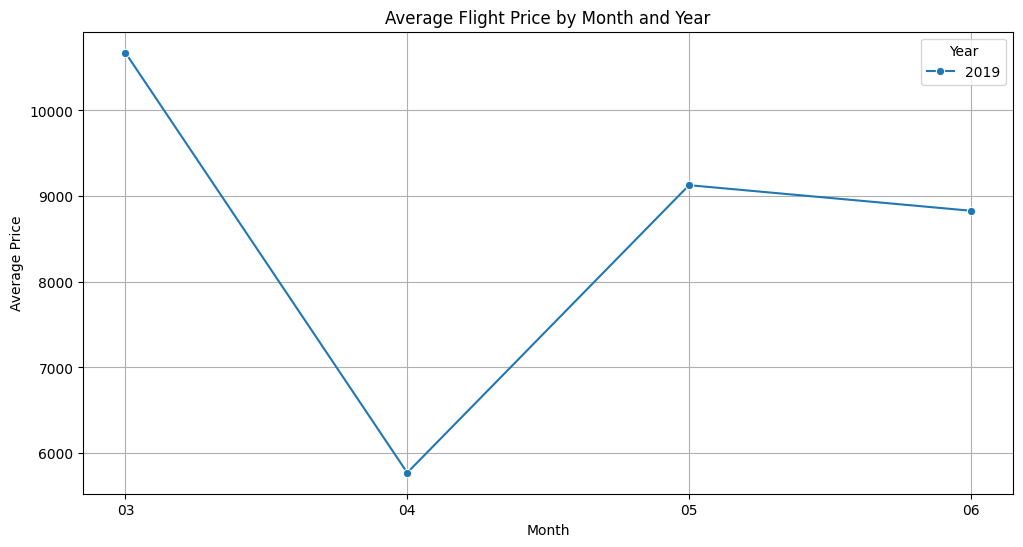

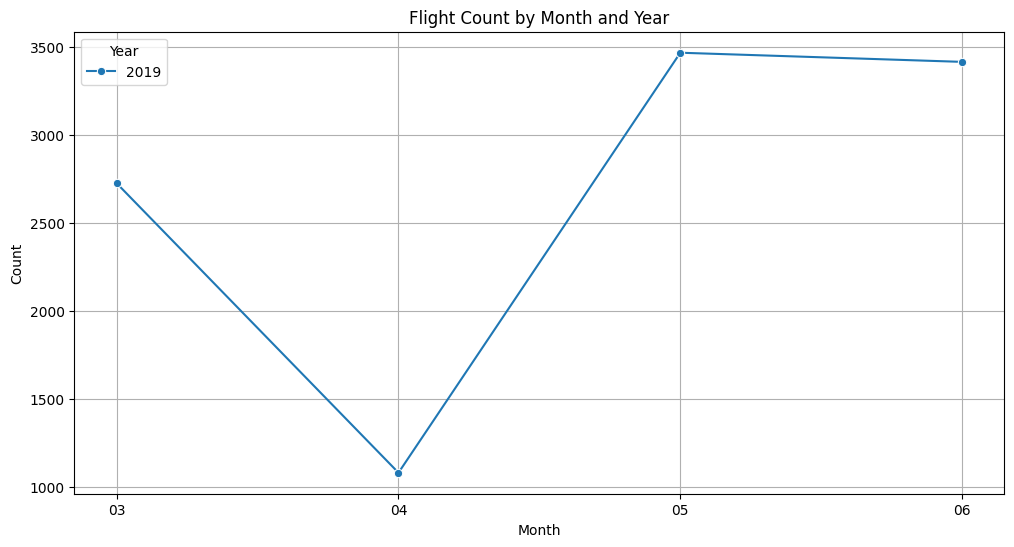

In [ ]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the
# Flight Price dataset to identify the peak travel season.
# What features would you analyze to identify the peak season, and how would you present your findings to your boss?

# Group data by month (and year if dataset spans multiple years) to analyze flight count and average price
monthly_data = df.groupby(['year', 'month']).agg({'Price': ['mean', 'count']}).reset_index()
monthly_data.columns = ['Year', 'Month', 'Average_Price', 'Flight_Count']

# In Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Average_Price', hue='Year', data=monthly_data, marker='o')
plt.title('Average Flight Price by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Flight_Count', hue='Year', data=monthly_data, marker='o')
plt.title('Flight Count by Month and Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')
plt.grid(True)
plt.show()


# Base on the chart below it shows that March has the highest sale

<ipython-input-89-b8ff71c04cc1>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_flight_count = price_count_per_destination_month.pivot("Destination", "month", "Flight_Count").fillna(0).astype(int)


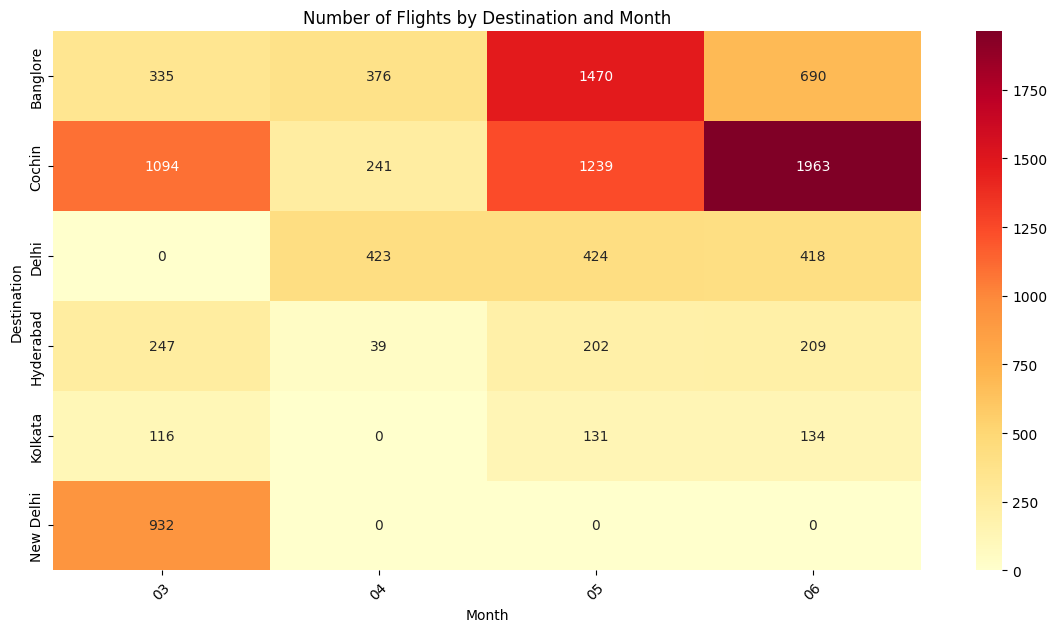

In [ ]:
# Q7. You are a data analyst for a flight booking website, and
# you have been asked to analyze the Flight Price dataset to identify any trends in flight prices.
# What features would you analyze to identify these trends, and
# what visualizations would you use to present your findings to your team?

# I would like to analyze first the destination if many people travel to a certain destination

# I would like to use the month I would like to see if there is a significant reason why people travel during those months
df['month'] = df['month'].astype('category')

# Aggregating data for the heatmap
price_count_per_destination_month = df.groupby(['Destination', 'month']).agg(Flight_Count=('Price', 'count')).reset_index()

# Pivot the data for visualization
pivot_flight_count = price_count_per_destination_month.pivot("Destination", "month", "Flight_Count").fillna(0).astype(int)

# Plotting the flight count heatmap with integer formatting
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_flight_count, cmap="YlOrRd", annot=True, fmt="d")
plt.title('Number of Flights by Destination and Month')
plt.xlabel('Month')
plt.ylabel('Destination')
plt.xticks(rotation=45)
plt.show()

<ipython-input-90-2dedf3f21e0e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_flight_count = flight_counts.pivot("Route", "month", "Flight_Count").fillna(0).astype(int)


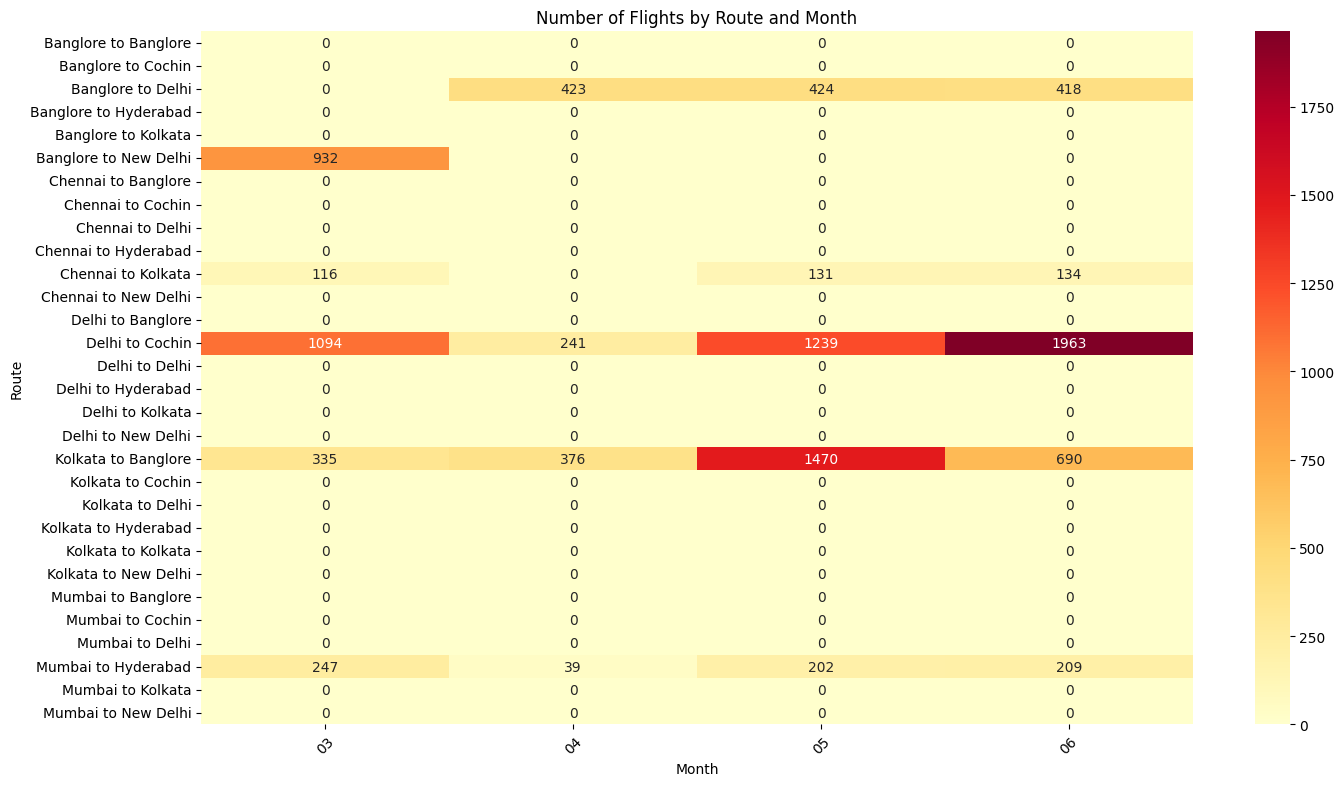

In [ ]:
# I would like to check the Source and the Destination this time to check from where are people that travels to a certain destination
# Based on the visualization below number of flight that are from Delhi and bound to Cochin has the highest and more expensive during May or Spring
# Adjusting the code to include 'Source' in the analysis
df['month'] = df['month'].astype('category')  # Ensure month is treated as categorical

# Aggregating data to calculate the total count of flights per source, destination, and month combination
flight_counts = df.groupby(['Source', 'Destination', 'month']).agg(Flight_Count=('Price', 'count')).reset_index()

# Creating a new column that combines Source and Destination for a detailed route analysis
flight_counts['Route'] = flight_counts['Source'] + " to " + flight_counts['Destination']

# Pivot the data for visualization, using the new 'Route' column and 'month'
pivot_flight_count = flight_counts.pivot("Route", "month", "Flight_Count").fillna(0).astype(int)

# Plotting the flight count heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(pivot_flight_count, cmap="YlOrRd", annot=True, fmt="d")
plt.title('Number of Flights by Route and Month')
plt.xlabel('Month')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?
# As a data scientist analyze the Flight Price dataset and identify factors affecting flight prices, I would need to consider a comprehensive set of features that could influence pricing like
# the Total Stops and duration of flights, Direct flights are often more expensive than flights with stops, and longer flights could be priced differently.
# I would also consider the time of flights, Prices may vary depending on the time of day, with flights at more convenient times possibly being more expensive.
# also needs to consider the type of seats, if it is first class or economy.
# Also there could be additional Services like baggage fees, meal options, and other add-ons can also play a role in the overall price.


Google Playstore (GPS)


In [ ]:

#Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?
# Has 13 cols and rows 10840


In [91]:
GPSdf = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [94]:
GPSdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [95]:
GPSdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [96]:
GPSdf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


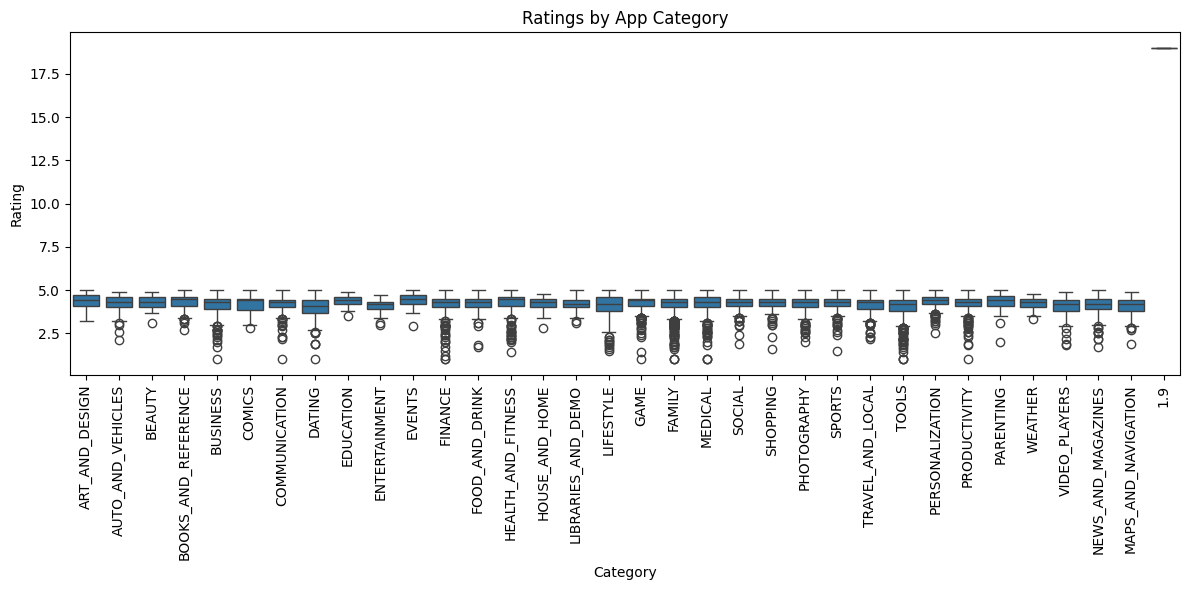

In [97]:
# # Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=GPSdf)
plt.title('Ratings by App Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for the rotated category labels
plt.show()

In [102]:
GPSdf['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [109]:
#check the the category 1.9
check19 = GPSdf.loc[GPSdf['Category']==('1.9')].iloc[0]
print(check19)

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [115]:
# Since 1.9 category has only one record it can be categorized incorrectly.
# I can add it to one of other category
# or remove it or drop the record
# I choose the latter

GPSdf.drop(GPSdf[GPSdf['Category'] == '1.9'].index, inplace=True)

In [116]:
GPSdf['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [110]:

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
GPSdf.isnull().sum()

# Data below shows that more than 1K of App does not have an ratings it may affect any analysis that we can perform if we look on the ratings



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

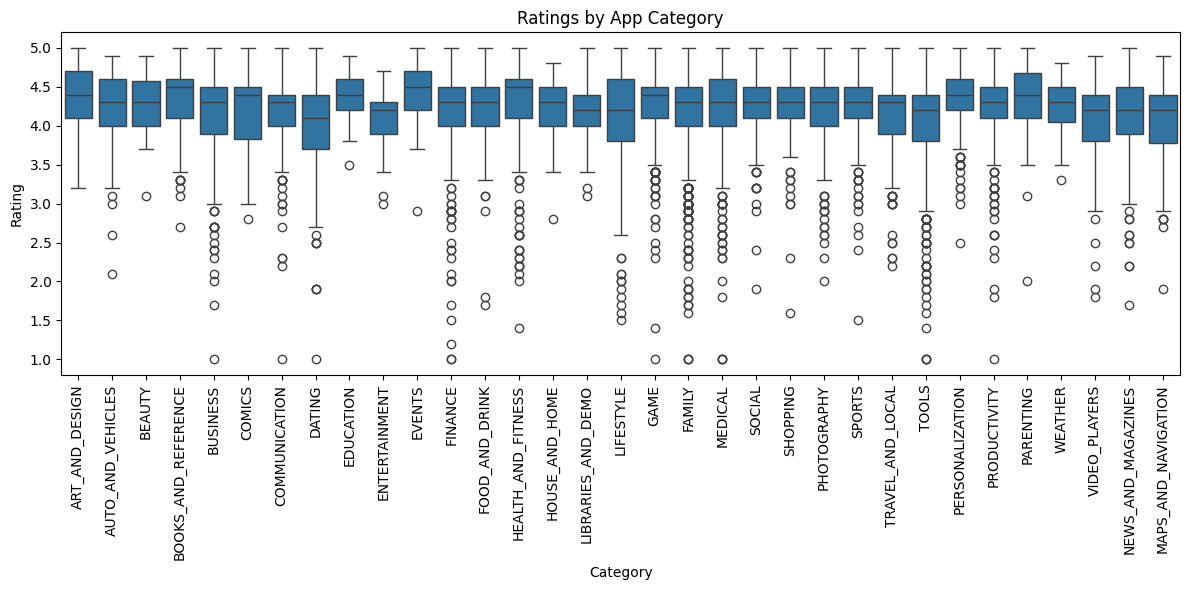

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=GPSdf)
plt.title('Ratings by App Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for the rotated category labels
plt.show()

In [119]:

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.


# First convert size column into float datatype
def convert_size(size):
  if 'M' in size.upper():
    x=size.strip('M')
    return int(float(x))*1024
  elif 'k' in size.lower():
    x=size.strip('k')
    return int(float(x))
  else:
    return np.nan

In [120]:
GPSdf['Size'] = GPSdf['Size'].apply(convert_size)

In [121]:
GPSdf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8192.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2048.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


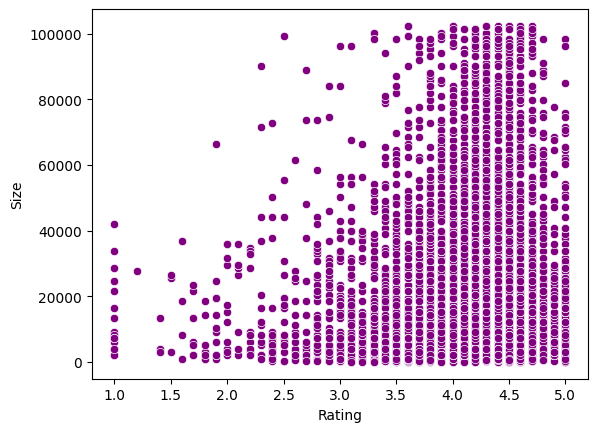

In [123]:
sns.scatterplot(data=GPSdf, y='Size', x='Rating', color='purple')
plt.show()

In [124]:

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
# App that are in Finance, Lifestyle,Events category people then to pay it is also understood that a certain amount
# are needed for security purposes, resources that are involve in these services needs to have a highest security posible

cols = ['Installs', 'Price']
chars_to_remove=['+', ',', '$']
for col in cols:
    for char in chars_to_remove:
        GPSdf[col] = GPSdf[col].str.replace(char, '')

<ipython-input-124-94a08a950f8c>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GPSdf[col] = GPSdf[col].str.replace(char, '')


In [126]:
GPSdf['Installs']=GPSdf['Installs'].astype('float')
GPSdf['Price']=GPSdf['Price'].astype('float')

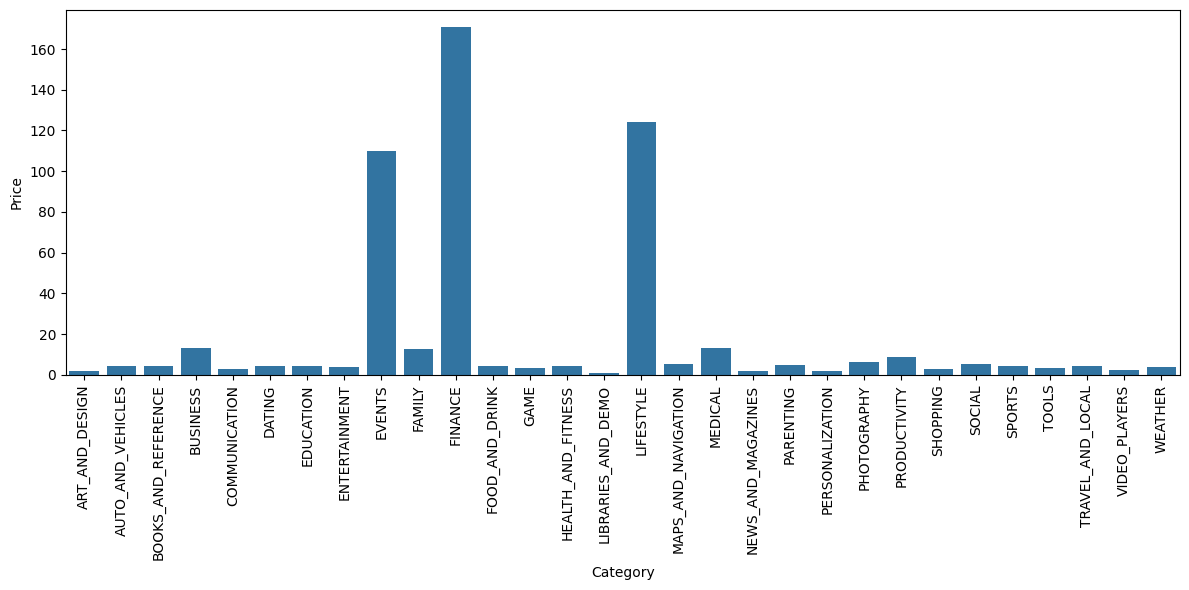

In [129]:
# remove price that are not zero
q13df = GPSdf[GPSdf['Price'] != 0]
avgcatprice = q13df.groupby('Category')['Price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avgcatprice.index, y=avgcatprice.values )
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [135]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.



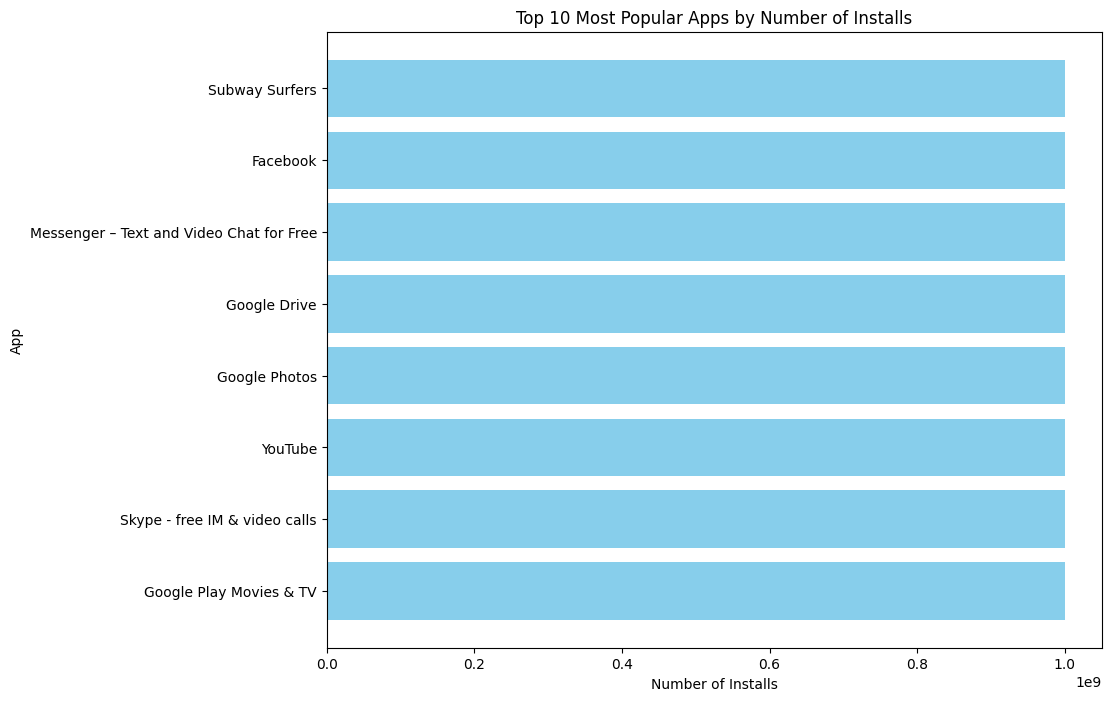

In [134]:

# Identifying the top 10 apps by installs
top_10_apps = GPSdf.sort_values(by='Installs', ascending=False).head(10)

# Creating a bar chart for the top 10 apps
plt.figure(figsize=(10, 8))
plt.barh(top_10_apps['App'], top_10_apps['Installs'], color='skyblue')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Top 10 Most Popular Apps by Number of Installs')
plt.gca().invert_yaxis()  # To display the app with the highest installs on top
plt.show()

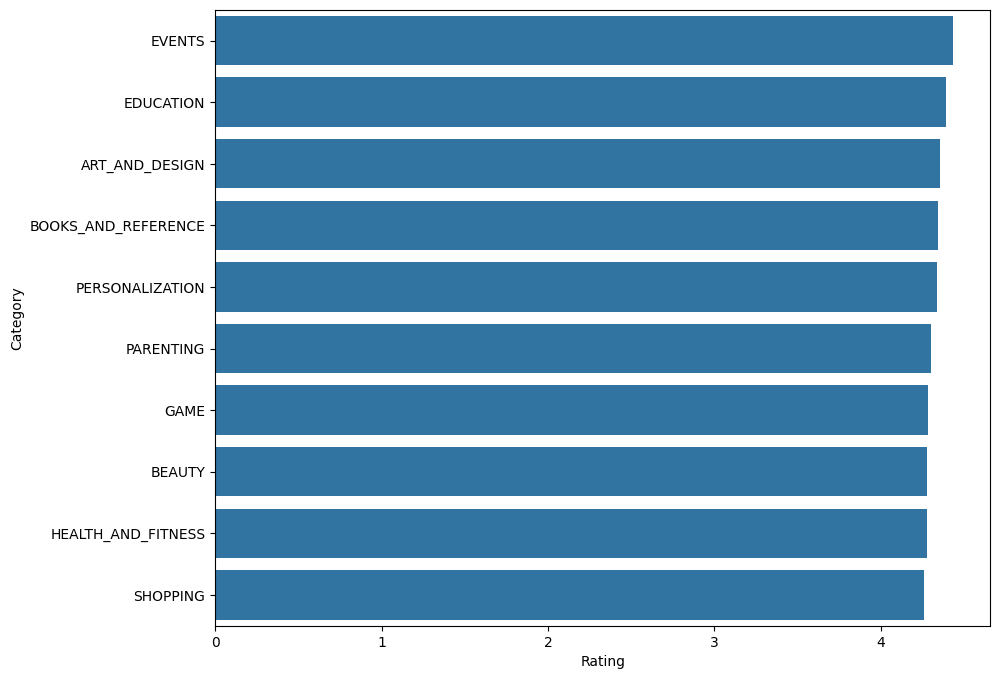

In [141]:

# # Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

# use average rating instead
avgratings = GPSdf.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=avgratings.index, x=avgratings.values)
plt.xlabel('Rating')
plt.show()

In [142]:

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?




In [ ]:

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [ ]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
